In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

---

Load dataset _iris_ dari library seaborn

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Untuk _machine learning,_ secara umum, baris pada tabel disebut dengan _samples,_ sehingga jumlah baris adalah  ```n_samples```. Sedangkan kolom, yang mendeskripsikan tiap-tiap _sample,_ disebut dengan _features_ dengan jumlah kolom adalah ```n_features```.

Dari beberapa _features,_ salah satunya biasanya akan digunakan sebagai prediksi. Misalnya pada dataset _iris_ di atas kita ingin membuat model untuk memprediksikan spesies dari bunga yang kita temukan. Maka kolom '```species``` akan digunakan sebagai prediksi dan disebut dengan _target vector._

Dengan mengingat target array ini, kita dapat menggunakan Seaborn untuk memvisualisasikan data dengan mudah:

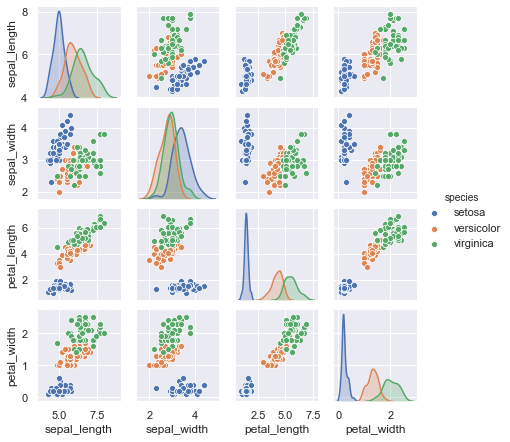

In [4]:
%matplotlib inline
sns.pairplot(iris, hue = 'species', height = 1.5);

Untuk digunakan dalam Scikit-Learn, kita akan mengekstrak _feature matrix,_ ```X``` (sesuai dengan konvensi) dan _target vector,_ ```y``` (sesuai dengan konvensi) dari ```DataFrame```, sehingga apabila divisualisasikan akan menjadi seperti:

![title](img/feature_matrix_and_target_vector.png)

In [4]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

***

# Scikit-Learn's Estimator API: Basics of the API

Secara umum, langkah-langkah untuk untuk menggunakan _Scikit-Learn estimator API_ adalah sebagai berikut: <br>
1. Pilih kelas model dengan mengimport kelas _estimator_ yang sesuai dari _Scikit-Learn._ <br>
2. Tentukan model _hyperparameters_ (parameter yang harus ditetapkan sebelum model sesuai dengan data) dengan menginisiasi kelas ini menggunakan nilai yang diinginkan. <br>
3. Susun data ke dalam bentuk _feature matrix_ dan _target vector_ seperti yang telah dibahas di atas. <br>
4. Fitting model dengan data dengan cara menggunakan metode ```fit()``` <br>
5. Aplikasikan mode ke data yang baru: <br>
    - Untuk _supervised learning,_ seringkali memprediksikan label untuk data yang tidak diketahui menggunakan metode ```predict()```. <br>
    - Untuk _unsupervised learning,_ seringkali mengubah atau menyimpulkan sifat dari data menggunakan metode ```transform()``` atau ```predict()```.

### Supervised learning example: Simple linear regression

Kita akan menggunakan data sederhana berikut untuk contoh regresi:

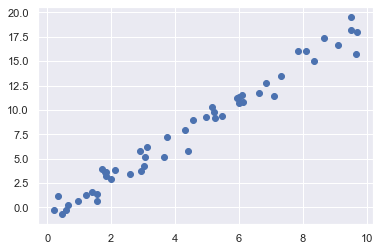

In [6]:
rng = np.random.RandomState(42)

x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

plt.scatter(x, y);

Dengan mengikuti langkah-langkah untuk untuk menggunakan _Scikit-Learn estimator API_ di atas:

1. Pilih kelas dari model

In [7]:
from sklearn.linear_model import LinearRegression

2. Tentukan model _hyperparameters_ <br>
poin-poin penting dari langkah ini adalah menjawab beberapa pertanyaan: <br>
    - Apakah kita ingin menyesuaikan dengan _offset_ (misalnya _y_\_intercept_)?
    - Apakah kita ingin model dinormalisasi?
    - Apakah kita ingin memproses ulang fitur untuk menambah fleksibilitas model?
    - Tingkat regularisasi apa yang ingin kita gunakan dalam model kita?
    - Berapa banyak komponen model yang ingin kita gunakan? <br>
    <br>
Pilihan-pilihan ini sering direpresentasikan sebagai _hyperparameters._ Dalam Scikit-Learn, _hyperparameters_ dipilih dengan memberikan nilai pada inisiasi model.

In [8]:
model = LinearRegression(fit_intercept = True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3. Susun data ke dalam bentuk _feature matrix_ dan _target vector_ <br>
Disini _target vector_ ```y``` sudah dalam bentuk yang benar (array dengan jumlah ```n_samples```, tapi kita perlu merubah bentuk ```x``` agar sesuai menjadi ```[n_samples, n_features]```

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

4. Fitting model dengan data

In [10]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

hasil perhitungan ini disimpan dalam atribut khusus dari model. Sesuai dengan perjanjian, semua parameter model hasil dari proses ```fit()``` dapat diakses dengan penambahan garis bawah di akhir.

In [11]:
model.coef_

array([1.9776566])

In [12]:
model.intercept_

-0.9033107255311164

Kedua parameter ini mewakili kemiringan (_slope_) dan titik potong. Kita melihat bahwa hasilnya sangat dekat dengan data yang sebenarnya, dengan kemiringan $2$ dan titik potong $-1$.

5. Aplikasikan model ke data yang baru: Prediksi label untuk data yang tidak diketahui <br>
Untuk memudahkah contoh ini, "data baru" yang akan digunakan berupa _array_ nilai $x$, dan kita akan bertanya nilai $y$ apa yang diprediksikan oleh model dengan menggunakan metode ```predict()```?

In [13]:
x_fit = np.linspace(-1, 11)

In [14]:
X_fit = x_fit[:, np.newaxis]
y_fit = model.predict(X_fit)

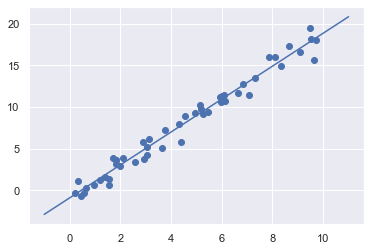

In [15]:
plt.scatter(x,y)
plt.plot(x_fit, y_fit);

---

# Supervised learning example: Iris classification

Pertanyaan kita adalah: dengan membuat model yang dilatih pada sebagian dari data Iris, seberapa baik kita dapat memprediksi label yang tersisa?

Kita ingin mengevaluasi model pada data yang belum pernah dilihat sebelumnya, jadi kita akan membagi data menjadi satu set pelatihan dan satu set pengujian. Ini bisa dilakukan dengan tangan, tetapi lebih nyaman menggunakan fungsi utilitas ```train_test_split```:

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)

Dengan mengikuti langkah-langkah untuk untuk menggunakan _Scikit-Learn estimator API_ di atas:

In [22]:
# Pilih kelas dari model
from sklearn.naive_bayes import GaussianNB

# Tentukan model hyperparameters
model = GaussianNB()

# Fitting model dengan data
model.fit(X_train, y_train)

# Aplikasikan model ke data yang baru
y_model = model.predict(X_test)

Akhirnya, kita dapat menggunakan ```accuracy_score``` untuk melihat keakuratan antara label yang diprediksi dengan nilai aslinya:

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_model, y_test)

0.9736842105263158

---

# Unsupervised learning example: Iris dimensionality reduction

Kita akan meminta model untuk mengembalikan dua komponen — yaitu, representasi dua dimensi dari data.

In [27]:
# Pilih kelas dari model
from sklearn.decomposition import PCA

# Tentukan model hyperparameters
model = PCA(n_components = 2)

# Fitting model dengan data. Perhatikan variabel y tidak ditentukan!
model.fit(X_iris)

# Transformasikan data menjadi 2 dimensi
X_2D = model.transform(X_iris)

In [30]:
X_2D.shape

(150, 2)

Sekarang mari kita plot hasilnya. Cara cepat untuk melakukan ini adalah dengan memasukkan hasilnya ke dalam Iris ```DataFrame``` yang asli, dan gunakan ```lmplot``` Seaborn untuk menunjukkan hasilnya:

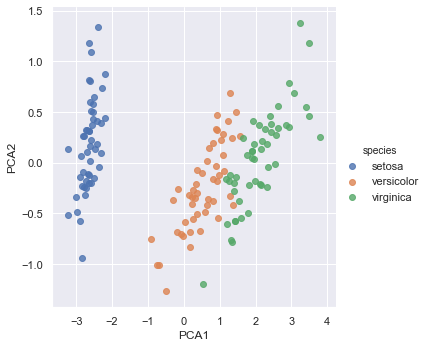

In [31]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

---

# Unsupervised learning: Iris clustering

Algoritma _clustering_ berusaha untuk menemukan kelompok data yang berbeda tanpa mengacu pada label apa pun.

In [34]:
# Pilih kelas dari model
from sklearn.mixture import GaussianMixture

# Tentukan model hyperparameters
model = GaussianMixture(n_components=3, covariance_type='full')

# Fitting model dengan data. Perhatikan variabel y tidak ditentukan!
model.fit(X_iris)

# Tentukan label klaster
y_gmm = model.predict(X_iris)

Sama seperti sebelumnya, kita akan menambahkan label ke Iris ```DataFrame``` dan menggunakan Seaborn untuk memplot hasilnya:

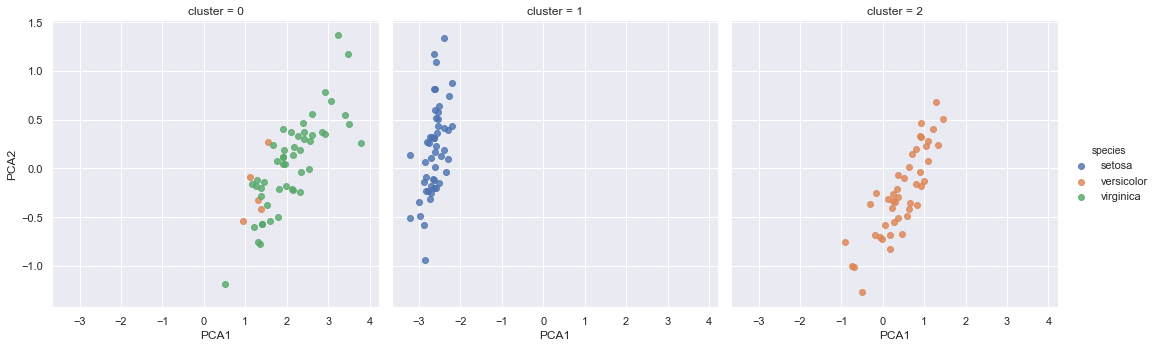

In [35]:
iris['cluster'] = y_gmm

sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

---

# Application: Exploring Hand-written Digits

### Loading and visualizing the digits data

Kita akan menggunakan akses data Scikit-Learn:

In [36]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

visualisasi seratus data pertama:

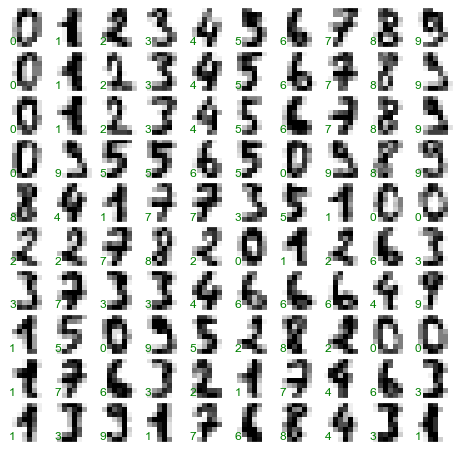

In [37]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Susun data ke dalam bentuk standard. Data tersebut sudah ada di dalam dataset _digits_ yang dapat diakses dengan cara:

In [38]:
X = digits.data
X.shape

(1797, 64)

In [39]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction

Di sini, kita akan menggunakan algoritma yang disebut _Isomap_, dan mengubah data menjadi 2 dimensi:

In [40]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

Mari kita plot data ini untuk melihat apakah kita dapat belajar sesuatu dari strukturnya:

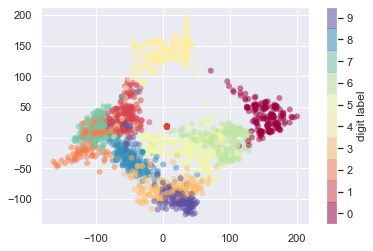

In [43]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Secara keseluruhan, klaster-klaster yang berbeda tampaknya dipisahkan dengan cukup baik. Hal ini memberitahu kita bahwa seharusnya algoritma klasifikasi bisa diterapkan pada data ini.

### Classification on digits

In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [45]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [46]:
accuracy_score(ytest, y_model)

0.8333333333333334

Nilai akurasinya $80 \%$, namum angka tersebut tidak memberi tahu kita dimana saja kesalahan prediksi terjadi. Untuk itu kita dapat menggunakan _confusion matrix,_ :

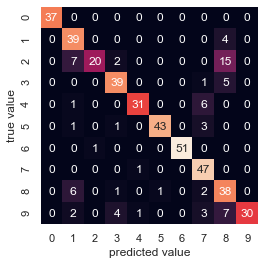

In [47]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Meneliti dari data di atas, kita dapat memperoleh _insight_ tentang dimana algoritma tidak berkinerja optimal. Untuk melampaui tingkat akurasi $80 \%$, mungkin patut untuk dipertimbangkan untuk berpindah ke algoritma yang lebih baik.